In [21]:
!pip install kagglehub

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

import os
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(uploaded[filename].decode("utf-8"))
os.chmod("/root/.kaggle/kaggle.json", 600)


Saving kaggle.json to kaggle (4).json


In [22]:
import kagglehub

path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)


100%|██████████| 9.94G/9.94G [01:40<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [26]:
#import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input

In [28]:
#To ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is Used')
else:
  print('GPU is not used')

GPU is Used


In [29]:
#load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [30]:
#list of all classes
classes = os.listdir(train_dir)
num_classes = len(classes)

#display the class names
print(f'Number of classes: {num_classes}')
print(f'Classes : {classes}')

Number of classes: 2
Classes : ['fire', 'nofire']


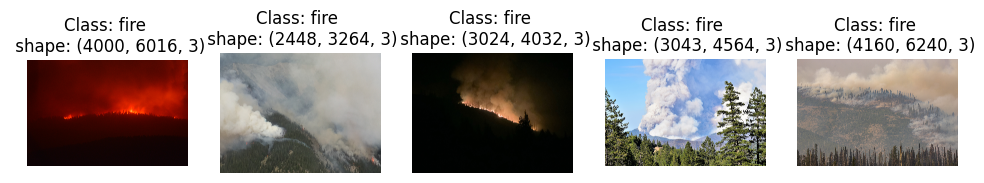

In [31]:
#lets visualize the images in the dataset
plt.figure(figsize=(12 , 10))
for i in range(5):
  class_path =os.path.join(train_dir, classes[0])
  img_name =os.listdir(class_path)[i]
  img_path = os.path.join(class_path,img_name)
  img = plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'Class: {classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


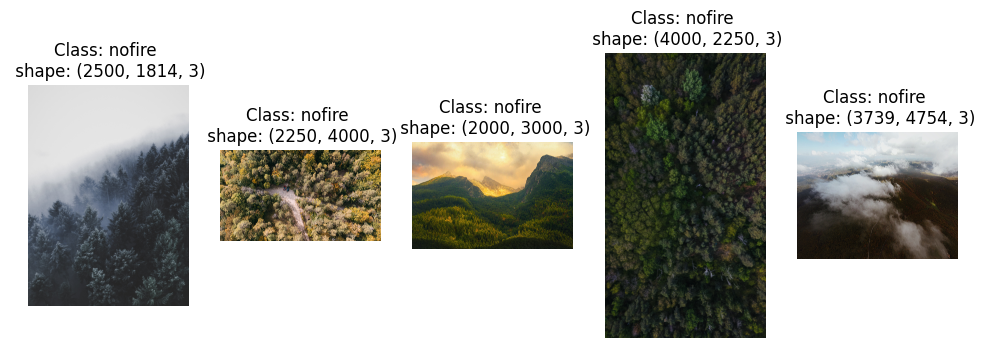

In [32]:
plt.figure(figsize=(12 , 10))
for i in range(5):
  class_path =os.path.join(train_dir, classes[1])
  img_name =os.listdir(class_path)[i]
  img_path = os.path.join(class_path,img_name)
  img = plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'Class: {classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()
